In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
#
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
#

original = pd.read_csv('epldata_final.csv', na_values=[np.nan, 'NONE'])

original

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,Edimilson Fernandes,West+Ham,21,CM,2,5.0,288,4.5,0.40%,38,2.0,Switzerland,0,1,20,0,1
457,Arthur Masuaku,West+Ham,23,LB,3,7.0,199,4.5,0.20%,34,4.0,Congo DR,0,2,20,0,1
458,Sam Byram,West+Ham,23,RB,3,4.5,198,4.5,0.30%,29,1.0,England,0,2,20,0,0
459,Ashley Fletcher,West+Ham,21,CF,1,1.0,412,4.5,5.90%,16,1.0,England,0,1,20,0,1


In [29]:
original.describe()

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,460.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,26.804772,2.180043,11.012039,763.776573,5.447939,57.314534,1.993478,0.034707,3.206074,10.334056,0.303688,0.145336
std,3.961892,1.000061,12.257403,931.805757,1.346695,53.113811,0.957689,0.183236,1.279795,5.726475,0.460349,0.352822
min,17.000000,1.000000,0.050000,3.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,24.000000,1.000000,3.000000,220.000000,4.500000,5.000000,1.000000,0.000000,2.000000,6.000000,0.000000,0.000000
50%,27.000000,2.000000,7.000000,460.000000,5.000000,51.000000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000
75%,30.000000,3.000000,15.000000,896.000000,5.500000,94.000000,2.000000,0.000000,4.000000,15.000000,1.000000,0.000000
max,38.000000,4.000000,75.000000,7664.000000,12.500000,264.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000


In [30]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    int64  
 5   market_value  461 non-null    float64
 6   page_views    461 non-null    int64  
 7   fpl_value     461 non-null    float64
 8   fpl_sel       461 non-null    object 
 9   fpl_points    461 non-null    int64  
 10  region        460 non-null    float64
 11  nationality   461 non-null    object 
 12  new_foreign   461 non-null    int64  
 13  age_cat       461 non-null    int64  
 14  club_id       461 non-null    int64  
 15  big_club      461 non-null    int64  
 16  new_signing   461 non-null    int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 61.4+ KB


In [31]:
original.dtypes

name             object
club             object
age               int64
position         object
position_cat      int64
market_value    float64
page_views        int64
fpl_value       float64
fpl_sel          object
fpl_points        int64
region          float64
nationality      object
new_foreign       int64
age_cat           int64
club_id           int64
big_club          int64
new_signing       int64
dtype: object

Text(0.5, 1.0, 'Correlation Heatmap')

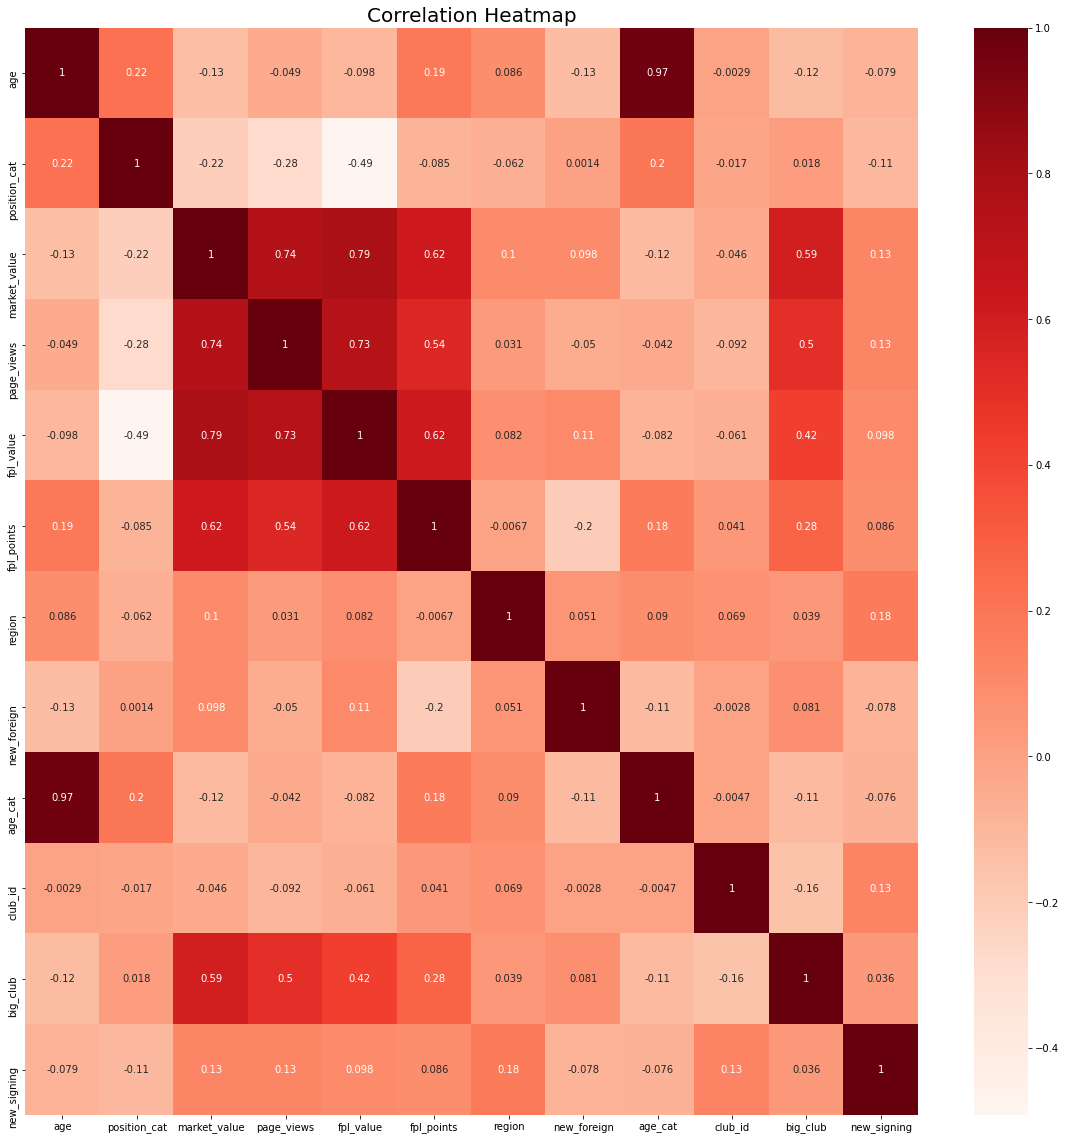

In [32]:
corr_matrix = original.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

In [33]:
df = original

df[df['region'].isnull()]

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
188,Steve Mounie,Huddersfield,22,CF,1,5.5,56,6.0,0.60%,0,NaN,Benin,0,2,8,0,0


In [34]:
#df['region'] = df['region'].replace('1.0', np.NaN)

In [35]:
Klub kolona cela može da se izbaci, jer postoji kolona club_id

SyntaxError: invalid syntax (<ipython-input-35-98eade548529>, line 1)

In [36]:
df = original.drop(columns=['club'], axis=1)

In [37]:
df = original.drop(columns=['name', 'club', 'position', 'nationality', 'fpl_sel', 'region'], axis=1)

#one_hot = LabelBinarizer()
#one_hot.fit_transform(df['club'])
#one_hot_multiclass = MultiLabelBinarizer()
#one_hot_multiclass.fit_transform(df['club'])
#df['name'].count
df

,age,position_cat,market_value,page_views,fpl_value,fpl_points,new_foreign,age_cat,club_id,big_club,new_signing
0,28,1,65.0,4329,12.0,264,0,4,1,1,0
1,28,1,50.0,4395,9.5,167,0,4,1,1,0
2,35,4,7.0,1529,5.5,134,0,6,1,1,0
3,28,1,20.0,2393,7.5,122,0,4,1,1,0
4,31,3,22.0,912,6.0,121,0,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
456,21,2,5.0,288,4.5,38,0,1,20,0,1
457,23,3,7.0,199,4.5,34,0,2,20,0,1
458,23,3,4.5,198,4.5,29,0,2,20,0,0
459,21,1,1.0,412,4.5,16,0,1,20,0,1


In [38]:
#df[df['region'].isnull()]

In [39]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

#kmeans = KMeans(init="random", n_clusters=2, n_init=10,max_iter=300,random_state=42 )
#kmeans.fit(df)
#kmeans_silhouette = silhouette_score(scaled_features, kmeans.labels_).round(2)
#kmeans_silhouette

In [40]:
dbscan = DBSCAN(eps=0.3)
dbscan.fit(scaled_features)
dbscan_silhouette = silhouette_score(scaled_features, dbscan.labels_).round (2)
dbscan_silhouette

-0.21

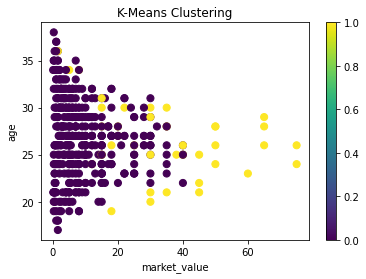

In [41]:
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(df, 2)
kmeans = pd.DataFrame(clust_labels)
#df.insert((df.shape[1]),'kmeans',kmeans)

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df['market_value'],df['age'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('market_value')
ax.set_ylabel('age')
plt.colorbar(scatter)

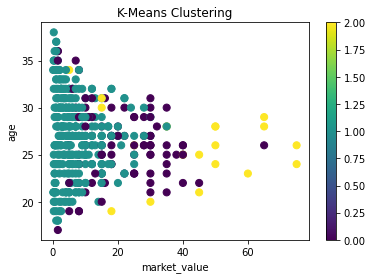

In [42]:
clust_labels, cent = doKmeans(df, 3)
kmeans = pd.DataFrame(clust_labels)
#df.insert((df.shape[1]),'kmeans',kmeans)

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df['market_value'],df['age'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('market_value')
ax.set_ylabel('age')
plt.colorbar(scatter)

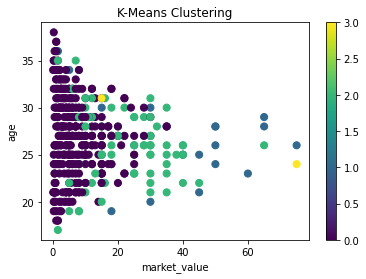

In [43]:
clust_labels, cent = doKmeans(df, 4)
kmeans = pd.DataFrame(clust_labels)
#df.insert((df.shape[1]),'kmeans',kmeans)

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df['market_value'],df['age'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('market_value')
ax.set_ylabel('age')
plt.colorbar(scatter)

In [ ]:
#normalizacija izbacenih kolona